## Question 1

<!-- This question covers DataFrame basics -->

Here is the url of a dataset
```python
url = "https://raw.githubusercontent.com/mwaugh0328/Data_Bootcamp_Fall_2017/master/data_bootcamp_exam/baseball_exam_data.csv"
```

That contains selected information about baseball teams in the National League (from [Sean Lahman's baseball archive](http://seanlahman.com/baseball-archive/statistics)). In this dataset there is the following information about the team's performance during a season.

| Column Name |	Description |
|---|---|
| yearID |	Year |
| lgID | League |
|teamID |	short team name|
|Wins|	wins|
|Loses|	loses|
|Runs	|runs scored|
|AtBats	|at bats|
|Hits	|hits|
|2Bhits|	doubles|
|3Bhits	|triples|
|HR	|home runs|
|BB	|bases on balls|
|park|	name of baseball park|
|name	|full team name|
|attendance	|season attendance|

---

(a) Import the dataset using pandas. Name your DataFrame as `nl`

(c) How many rows and columns does `nl` have?

(d) What are the column names in `nl`?

(3) What are the dtypes for the columns? For each different dtype in `nl`, please describe what that dtype means (Hint: There are two dtypes)

(f) Describe the results of the following code `westdivision = nl.name.tail(5)`. What type of object is `westdivision`? How does `westdivision ` relate to `nl`?

(30 points)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/mwaugh0328/Data_Bootcamp_Fall_2017/master/data_bootcamp_exam/baseball_exam_data.csv"
nl = pd.read_csv(url)

In [6]:
nl.shape

(15, 15)

In [7]:
nl.columns

Index(['yearID', 'lgID', 'teamID', 'Wins', 'Loses', 'Runs', 'AtBats', 'Hits',
       '2Bhits', '3Bhits', 'HR', 'BB', 'park', 'name', 'attendance'],
      dtype='object')

In [12]:
nl.dtypes
# Note how therea are two types. One is an integer
# and another is an object. The object basically picks up
# anythhing that can not be classified as a numerical (float or int) type

yearID         int64
lgID          object
teamID        object
Wins           int64
Loses          int64
Runs           int64
AtBats         int64
Hits           int64
2Bhits         int64
3Bhits         int64
HR             int64
BB             int64
park          object
name          object
attendance     int64
dtype: object

In [11]:
westdivision = nl.name.tail(5)

# These are the names of the last five baseball teams in the data set
# they happen to correspons with the nl west division...

10     Los Angeles Dodgers
11    Arizona Diamondbacks
12        San Diego Padres
13    San Francisco Giants
14        Colorado Rockies
Name: name, dtype: object

## Question 2

<!-- This question should test the students ability to access/create columns in the DataFrame -->

Please answer the questions below, giving each part its own code cell:

(a) Set the index to be the `Name` column. Make sure to save the result as `nl` for the following questions

(b) Create a two new columns named `BatAverage` that is  `Hits / (AtBats)` (batting average) and `HRAverage` that is of `HR / (AtBats)` 

(c) What is the **mean** batting average? What is the **median** home run average?

(d) Report two correlations: the correlation between batting average and wins; the correlation between wins and attendance.

(d) Create a horizontal bar plot of the `BatAverage` column. Tighten the x-axis so that it lies between 0.22 and 0.28. Make sure the colors of the bars are all the same.

(20 points)

In [13]:
nl.set_index("name", inplace = True)

In [15]:
nl["BatAverage"] = nl.Hits / nl.AtBats
nl["HRAverage"] = nl.HR / nl.AtBats

In [17]:
print("Mean Batting Average", nl.BatAverage.mean())
print("Median Batting Average", nl.HRAverage.median())

Mean Batting Average 0.25108222779605144
Median Batting Average 0.026463657785028096


In [19]:
corr_mat = nl.corr()

print("Correlation of Wins and Attendence", corr_mat.Wins.attendance)

Correlation of Wins and Attendence 0.518344968346


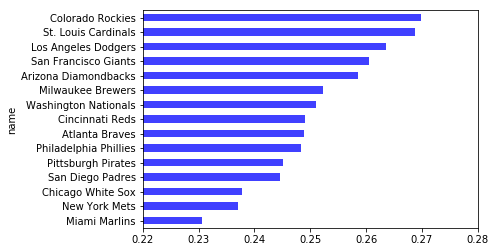

In [27]:
nl.BatAverage.sort_values().plot(kind = "barh", xlim = (0.22,0.28), color = "blue", alpha = 0.75)
plt.show()

## Question 3

<!-- This question should be about customizing a plot -->

Please do all parts below in _the same_ code cell. Leave comments in the code that help us find the code that corresponds to each part.

Tell a story about batting average, home run average and wins. 

#### Basic elements:

(a) Create a figure with one row and two column of axes

(b) In the left axes, make a scatter plot between batting average and wins. Label the x and y axis.

(c) In the right axes, make a scatter plot between home run average and wins. Label the x and y axis. 

(d) Set the title on the top axes to be informative about these plots.

(e) Change the size of the dots to correspond with attendance. Hint: You may want to change the scale.

---
#### Bonus Parts...

(e) (5 bonus)  Change the color of the dots **for only the west division** to be red.

(f) (5 bonus) Apply any other customizations you think would make the plot look better

(30 points + 10 bonus)

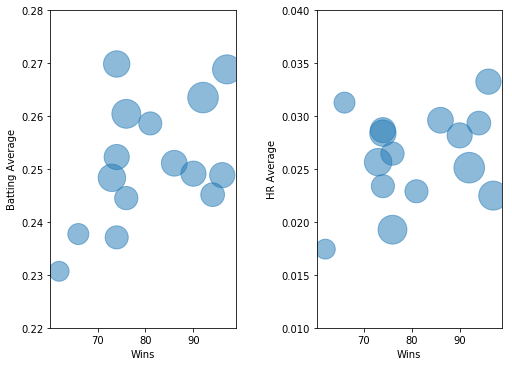

In [69]:
fig, ax = plt.subplots(1,2, figsize = (7,5))

fig.tight_layout(w_pad=5) 

ax[0].scatter(nl.Wins, nl.BatAverage, s = 0.00025*nl.attendance, alpha = 0.5)
ax[1].scatter(nl.Wins, nl.HRAverage, s = 0.00025*nl.attendance, alpha = 0.5)

ax[0].set_ylim(0.22,0.28)
ax[1].set_ylim(0.01,0.04)

ax[0].set_xlabel("Wins")
ax[1].set_xlabel("Wins")

ax[0].set_ylabel("Batting Average")
ax[1].set_ylabel("HR Average")

plt.show()